# Prisindeks på metaller

En prisindeks er ofte et vektet gjennomsnitt av flere priser over lengre tid. I denne oppgaven skal vi lage en indeks som ikke er vektet. 

Vi anbefaler å bruke PyCharm

# Importere moduler

In [9]:
import pandas as pd
import requests
from pyjstat import pyjstat
import matplotlib.pyplot as plt
import datetime

Vi skal bruke disse fire modulene i denne oppgaven.

# Gjennomføre spørring

In [3]:
URL = "https://data.ssb.no/api/v0/no/table/07199/"

query = {
  "query": [
    {
      "code": "Tid",
      "selection": {
        "filter": "all",
        "values": ["*"]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

resultat = requests.post(URL, json = query)

Vi angir først variabelen URL med nettadressen til tabellen på statistikkbanken. Her bruker vi tabell som viser spotpris på visse metaller.

Deretter angir vi variabelen query med selve spørringen hentet fra SSB sin API-konsoll.

Til slutt poster vi spørringen, og legger den i variabelen resultat

# Lage DataFrame

In [4]:
dataset = pyjstat.Dataset.read(resultat.text)

df = dataset.write('dataframe')

df.set_index('måned', inplace=True)
df = df[df.statistikkvariabel != 'Sølv (kr per unse)']
df = df[df.statistikkvariabel != 'Gull (kr per unse)']

Neste steg er å lage en pandas DataFrame. De to første linjene med kode lager en dataframe


Hvis vi nå skriver ut dataframet ser vi at kolonnene innholder måned, statistikkvariabel og verdi

For å få noe nyttig ut av dataen må vi bearbeide innholdet. 

Vi starter med å angi indekskolonnen med den aktuelle måneden. 

Deretter fjerner vi metallene sølv og gull, da de har en annen måleenhet enn de andre, og de er edle metaller.

# Beregne indeks

In [11]:
current_time = datetime.datetime.now()

current_year = current_time.year
current_month = current_time.month

indeks_mnd = []                                        #Vi må lage en tom liste til å begynne med, ellers får vi en Error
start_year = 1990                                                     #Startåret er 1990, det er da dataen fra SSB begynner.
while start_year != 2024:                          #Vi lager en while-løkke som går helt frem til det aktuelle året er 2024.
  for m in range(1,13):                       #Vi lager en for-løkke inni while-løkken. m vil her være den aktuelle måneden.
    tmp_list = []                                           #Vi trenger igjen en tom liste
    if m == current_month-1 and start_year == current_year:                  # Her setter vi en stopp på for-løkken når man har nådd dagens måned.
      break
    elif m <10:                                                      # vi må skille mellom 1 og 2 sifret m
      tmp_list = list(df.loc[str(start_year)+'M0'+str(m),'value'])  # her legger vi til verdien til hver enkelt metall i en liste
    else:
      tmp_list = list(df.loc[str(start_year)+'M'+str(m),'value'])
    summ = 0
    for element in tmp_list:                  # Her itererer vi gjennom listen med metallprisen for den aktuelle måneden
      summ += element                               # Her summerer vi hvert element og legger det i variabelen summ.

    indeks_tall = summ/5                          # Her får vi selve indekstallet for den aktuelle måneden.
    indeks_mnd.append(indeks_tall)           # deretter legger vi til indekstallet i en liste som ligger utenfor for-løkken
    summ = 0                                           #man må huske å 'resette' variabelene man bruker for hver iterasjon
    indeks_tall = 0

  start_year += 1 # til slutt legger vi til 1 på variabelen sttary_year, slik at når neste iterasjon går er også året oppdatert

Målet med denne kodebolken er å lage en liste med indekstallet for hver måned. 

Vi beregner selve indeksen ved å summere prisene på hvert metall og dele på antall metaller. 



# Lage liste for måneder

For å kunne anvende listen vi nettopp har laget, må vi lage enda en liste som er månedene indekstallene hører til. 

Siden listen med indekstall allerede er i kronologisk rekkefølge trenger vi bare å lage en liste som starter på '1990M01' og slutter på den siste måneden vi har data for. 

Listen vil se slik ut: ['1990M02', '1990M02, '1990M03, ...., 2023M07, 2023M08]


In [12]:
mnd_list = []                                       #vi starter med en tom liste
mnd = ''                                            #vi trenger også en tom variabel
year = 1990                                         #startår
while mnd != '2023M07':                             # vi bruker igjen en while-løkke som går helt til vi har nådd siste måned
  for x in range(1,13):                             # for-løkke som gir oss månedstallene (1-12)
    if x == current_month-1 and year == current_year:                     # betingelser som skal hindre feilkoder
      break
    elif x < 10:
      mnd = str(year)+ 'M0'+ str(x)
    else:
      mnd = str(year) + 'M'+ str(x)
    mnd_list.append(mnd)                            # Her legger vi til elementet vi lager for hver iterasjon vi går gjennom
  year += 1                                         # til slutt plusser vi på 1 på året, slik at neste gang while-løkken går er året oppdatert

# Gjøre om til dataframe og plotte graf

<Axes: xlabel='måned'>

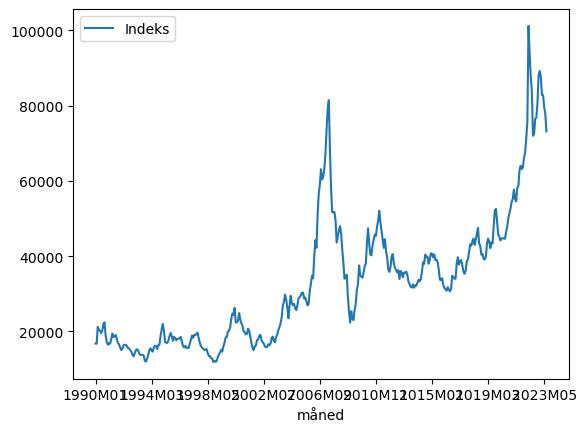

In [14]:
d = {'måned': mnd_list, 'Indeks': indeks_mnd}

indeks_df = pd.DataFrame(d)


indeks_df.plot(x='måned',y = 'Indeks')


Helt til slutt gjør vi om de to listene først til en dictionary, og deretter en dataframe.
Da får vi en dataframe med to kolonner, Måned og indekstall

Dette plotter vi i en graf